## Exploratory Data Analysis - Numerical Features

In this notebook, we will be performing our exploratory data analysis to find any relationsips between numerical features and our target sale price by plotting histograms, scatter plots and box plots.

### Contents:
* [Import Libraries & Read Dataset](#Import-Libraries-&-Read-Dataset)  
* [Heatmap of Correlation of Numerical Features with Sales Price](#Heatmap-of-Correlation-of-Numerical-Features-with-Sales-Price)
  * [Top 10 features with highest correlation with price](#Top-10-features-with-highest-correlation-with-price)
* [Histograms for numerical features](#Histograms-for-numerical-features)
  * [Analysis of Histograms](#Analysis-of-Histograms)
* [Boxplots](#Boxplots)
  * [Analysis of Boxplots](#Analysis-of-Boxplots)
* [Scatter Plots](#Scatter-Plots)
  * [Analysis of Scatter Plots](#Analysis-of-Scatter-Plots)
* [Summary](#Summary)

### Import Libraries & Read Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%config InlineBackend.figure_format='retina'
%matplotlib inline

We will explore the data visually to find features that have correlation with our target sales price

In [2]:
# read cleaned training data
file = '../datasets/train_clean.csv'

train = pd.read_csv(file, index_col='Id')
#review first first few rows of dataframe
train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,69.0552,13517,Pave,NONE,IR1,Lvl,AllPub,...,0,0,NONE,NONE,NONE,0,3,2010,WD,130500
544,531379050,60,RL,43.0000,11492,Pave,NONE,IR1,Lvl,AllPub,...,0,0,NONE,NONE,NONE,0,4,2009,WD,220000
153,535304180,20,RL,68.0000,7922,Pave,NONE,Reg,Lvl,AllPub,...,0,0,NONE,NONE,NONE,0,1,2010,WD,109000
318,916386060,60,RL,73.0000,9802,Pave,NONE,Reg,Lvl,AllPub,...,0,0,NONE,NONE,NONE,0,4,2010,WD,174000
255,906425045,50,RL,82.0000,14235,Pave,NONE,IR1,Lvl,AllPub,...,0,0,NONE,NONE,NONE,0,3,2010,WD,138500


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     2051 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

## Heatmap of Correlation of Numerical Features with Sales Price

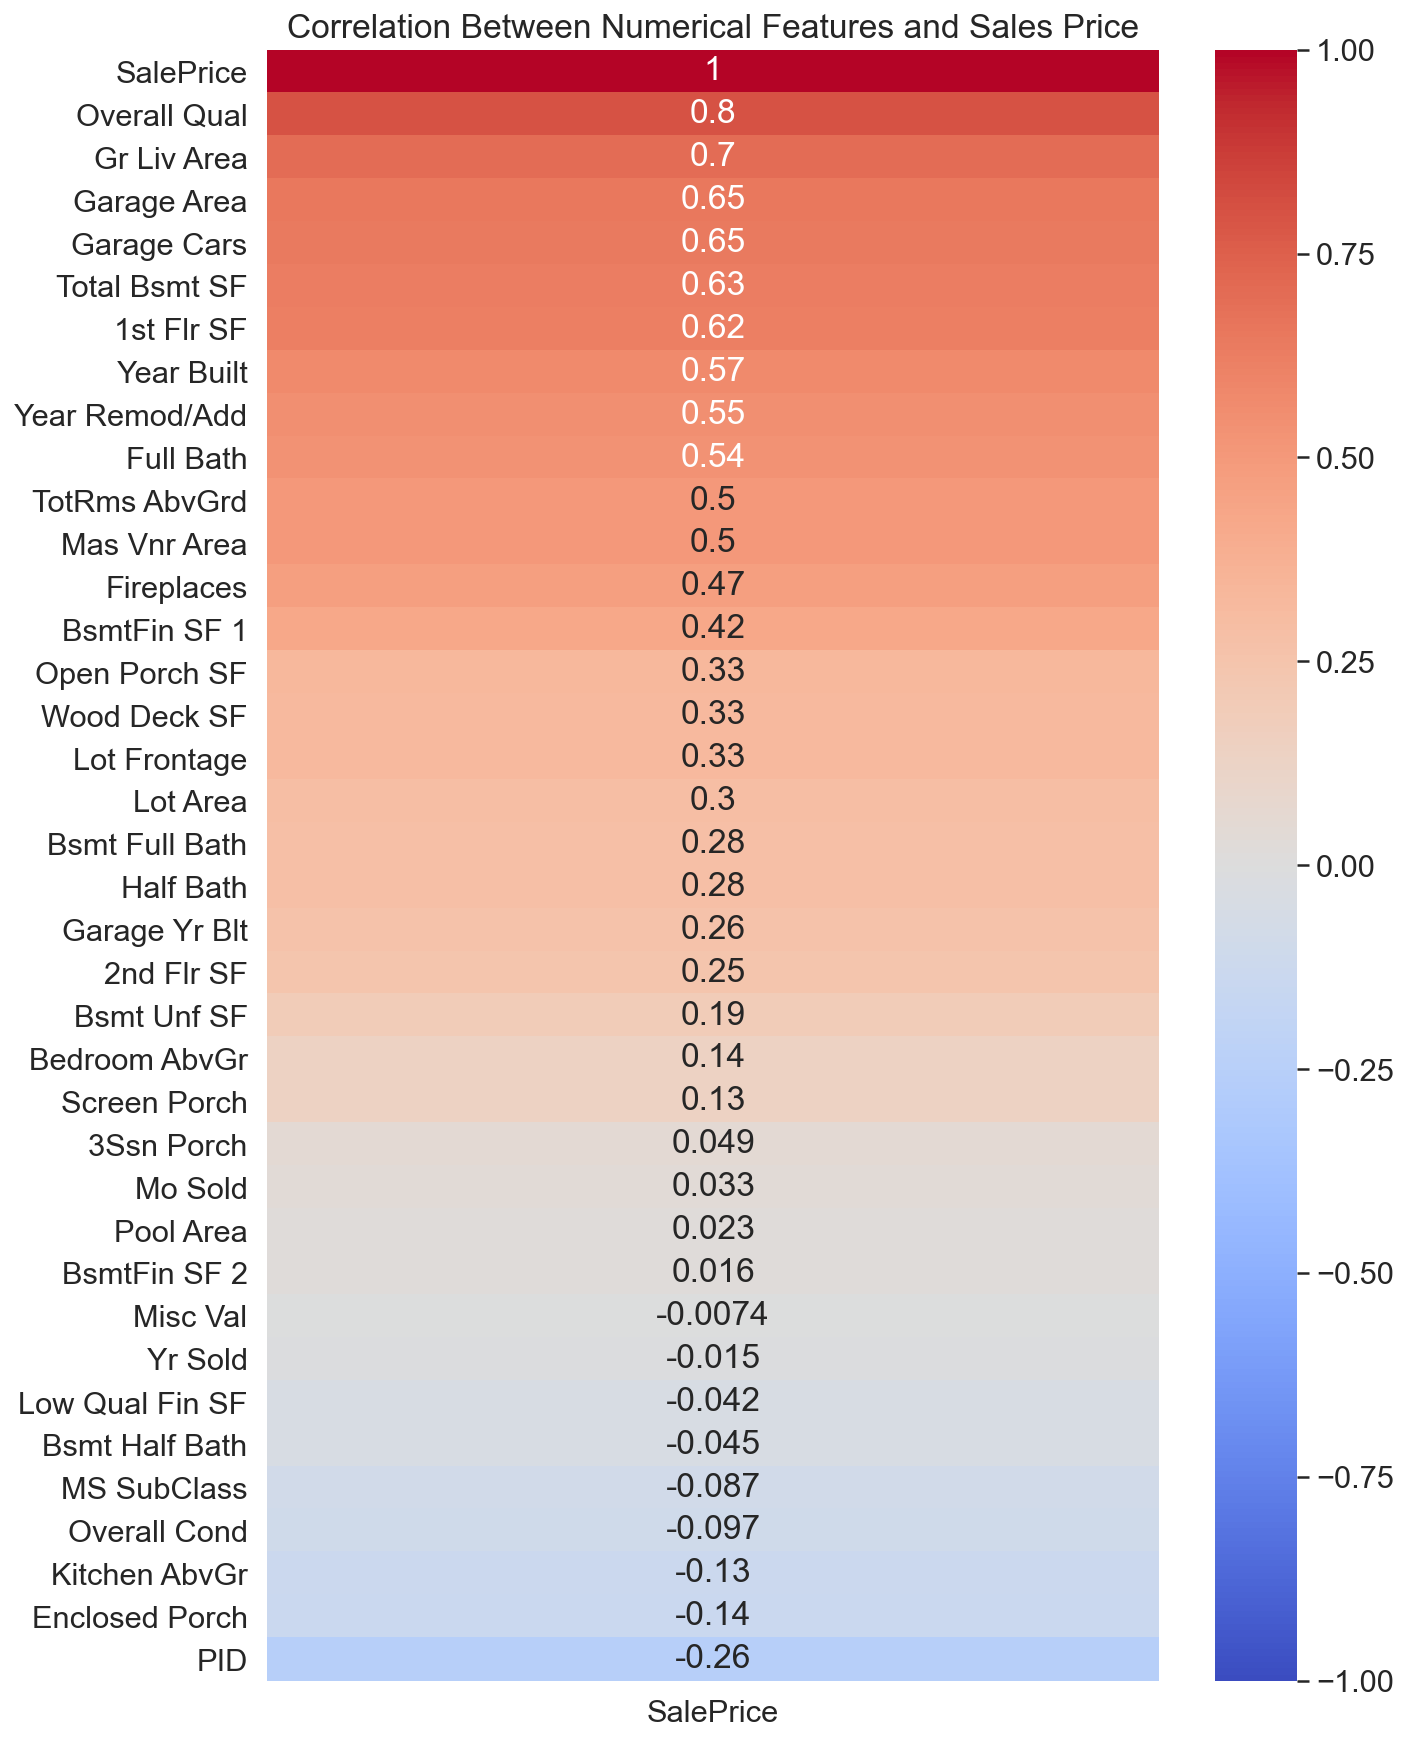

In [4]:
#plot correlation heatmap for numerical features with sales price
plt.figure(figsize=(10,15))
sns.set(font_scale=1.4)
sns.heatmap(train.corr()[["SalePrice"]].sort_values("SalePrice", ascending = False), 
                                                    annot=True, 
                                                    cmap="coolwarm", 
                                                    vmin=-1, 
                                                    vmax=1);
plt.title('Correlation Between Numerical Features and Sales Price');

##### Top 10 features with highest correlation with price

| No. | Feature        | Feature Description                                                    | Type of Feature |
|:-----|:----------------|:------------------------------------------------------------------------|:-----------------|
| 1   | Overall Qual   | Rates the overall material and finish of the house                     | Ordinal         |
| 2   | Gr Liv Area    | Above grade (ground) living area square feet                           | Continuous      |
| 3   | Garage Area    | Size of garage in square feet                                          | Continuous      |
| 4   | Garage Cars    | Size of garage in car capacity                                         | Discrete        |
| 5   | Total Bsmt SF  | Total square feet of basement area                                     | Continuous      |
| 6   | 1st Flr SF     | First Floor square feet                                                | Continuous      |
| 7   | Year Built     | Year Built                                                             | Discrete        |
| 8   | Year Remod/Add | Remodel date (same as construction date if no remodeling or additions) | Discrete        |
| 9   | Full Bath      | Full bathrooms above grade                                             | Discrete        |
| 10  | TotRms AbvGrd  | Total rooms above grade (does not include bathrooms)                   | Discrete        |

The heat map above shows the corelation of the features, with numercal values, with sales price. These features will have correlation that are close to either 1 or -1. 
* Positive Correlation: An increase in a unit of the feature will result in an **increase** in sales price
* Negative Correlation: An increase in a unit of the feature will result in an **decrease** in sales price  

The top 5 features where correlation is close to 1 or -1 are:

* Overall Qual (Ordinal) - 0.8
* Ground Living Area (Continuous) - 0.7
* Garage Area (Continuous)  - 0.65
* Garage Cars (Discrete) - 0.65
* Total Bsmt SF (Continuous)- 0.63

As expected, house prices are usually determined by quality of the house and its size. It seems like other than the overall quality of the home, residents of Ames do value having a garage and basement space as essential to their home.

We will zoom in on the top 10 features that have highest correlations with price and choose 4-5 of them to use form our model.


### Histograms for numerical features

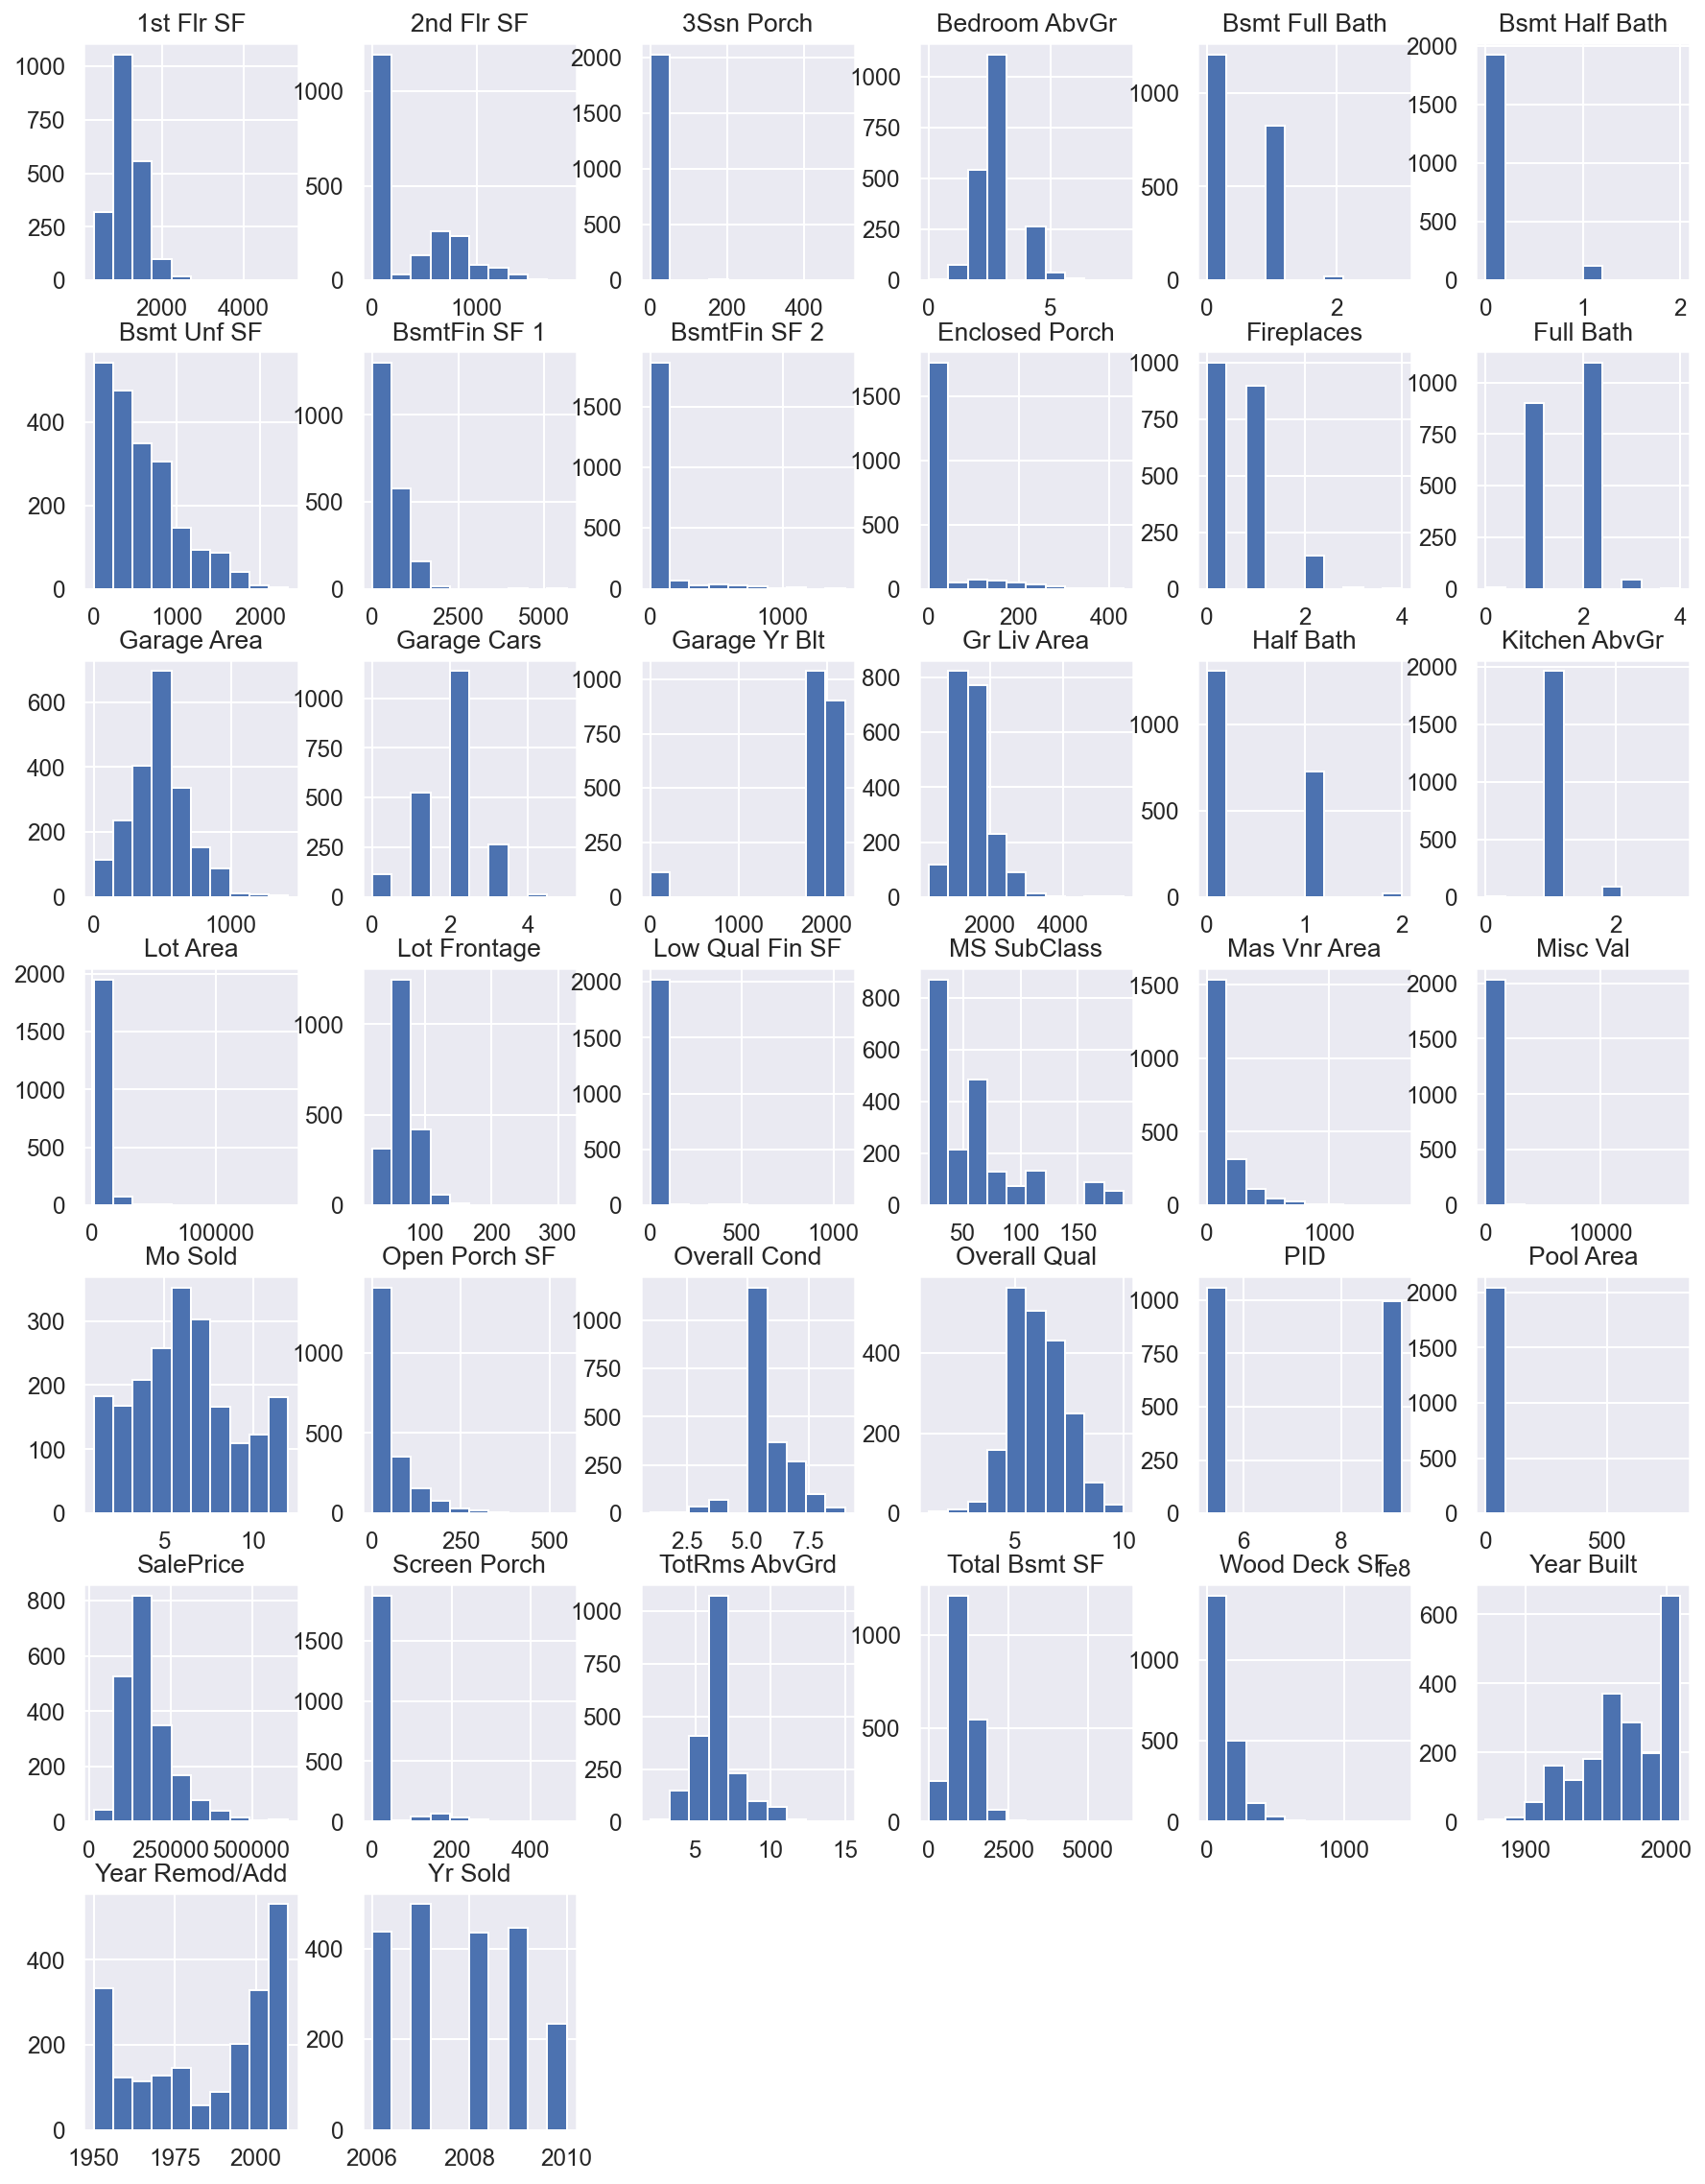

In [5]:
#plot histograms for numerical features
sns.set(font_scale=1.1)
train.hist(figsize=(15, 20));

#### Analysis of Histograms

From the histograms, we can infer that our sales price generally seem to be in the shape of a normal distribution, which is a good fit for model. 

This is in line with the assumption for a regression regression that features need to be as close to normal distribution as possible. 

Not suprisingly, our top 5 features with highest correlation also show a general normal distribution, that is similar to the target.

### Boxplots

Plotting boxplots provides us insights to outliers as well as the distribution of the features. This is inline with assumptions of a linear regression of **normality** and **Equality of Variances** where residuals should follow a normal distribution and they should have a roughly consistent pattern.

We are only able to plot boxplots for non continuous variables as boxplots are not effective for features that have continuous values 

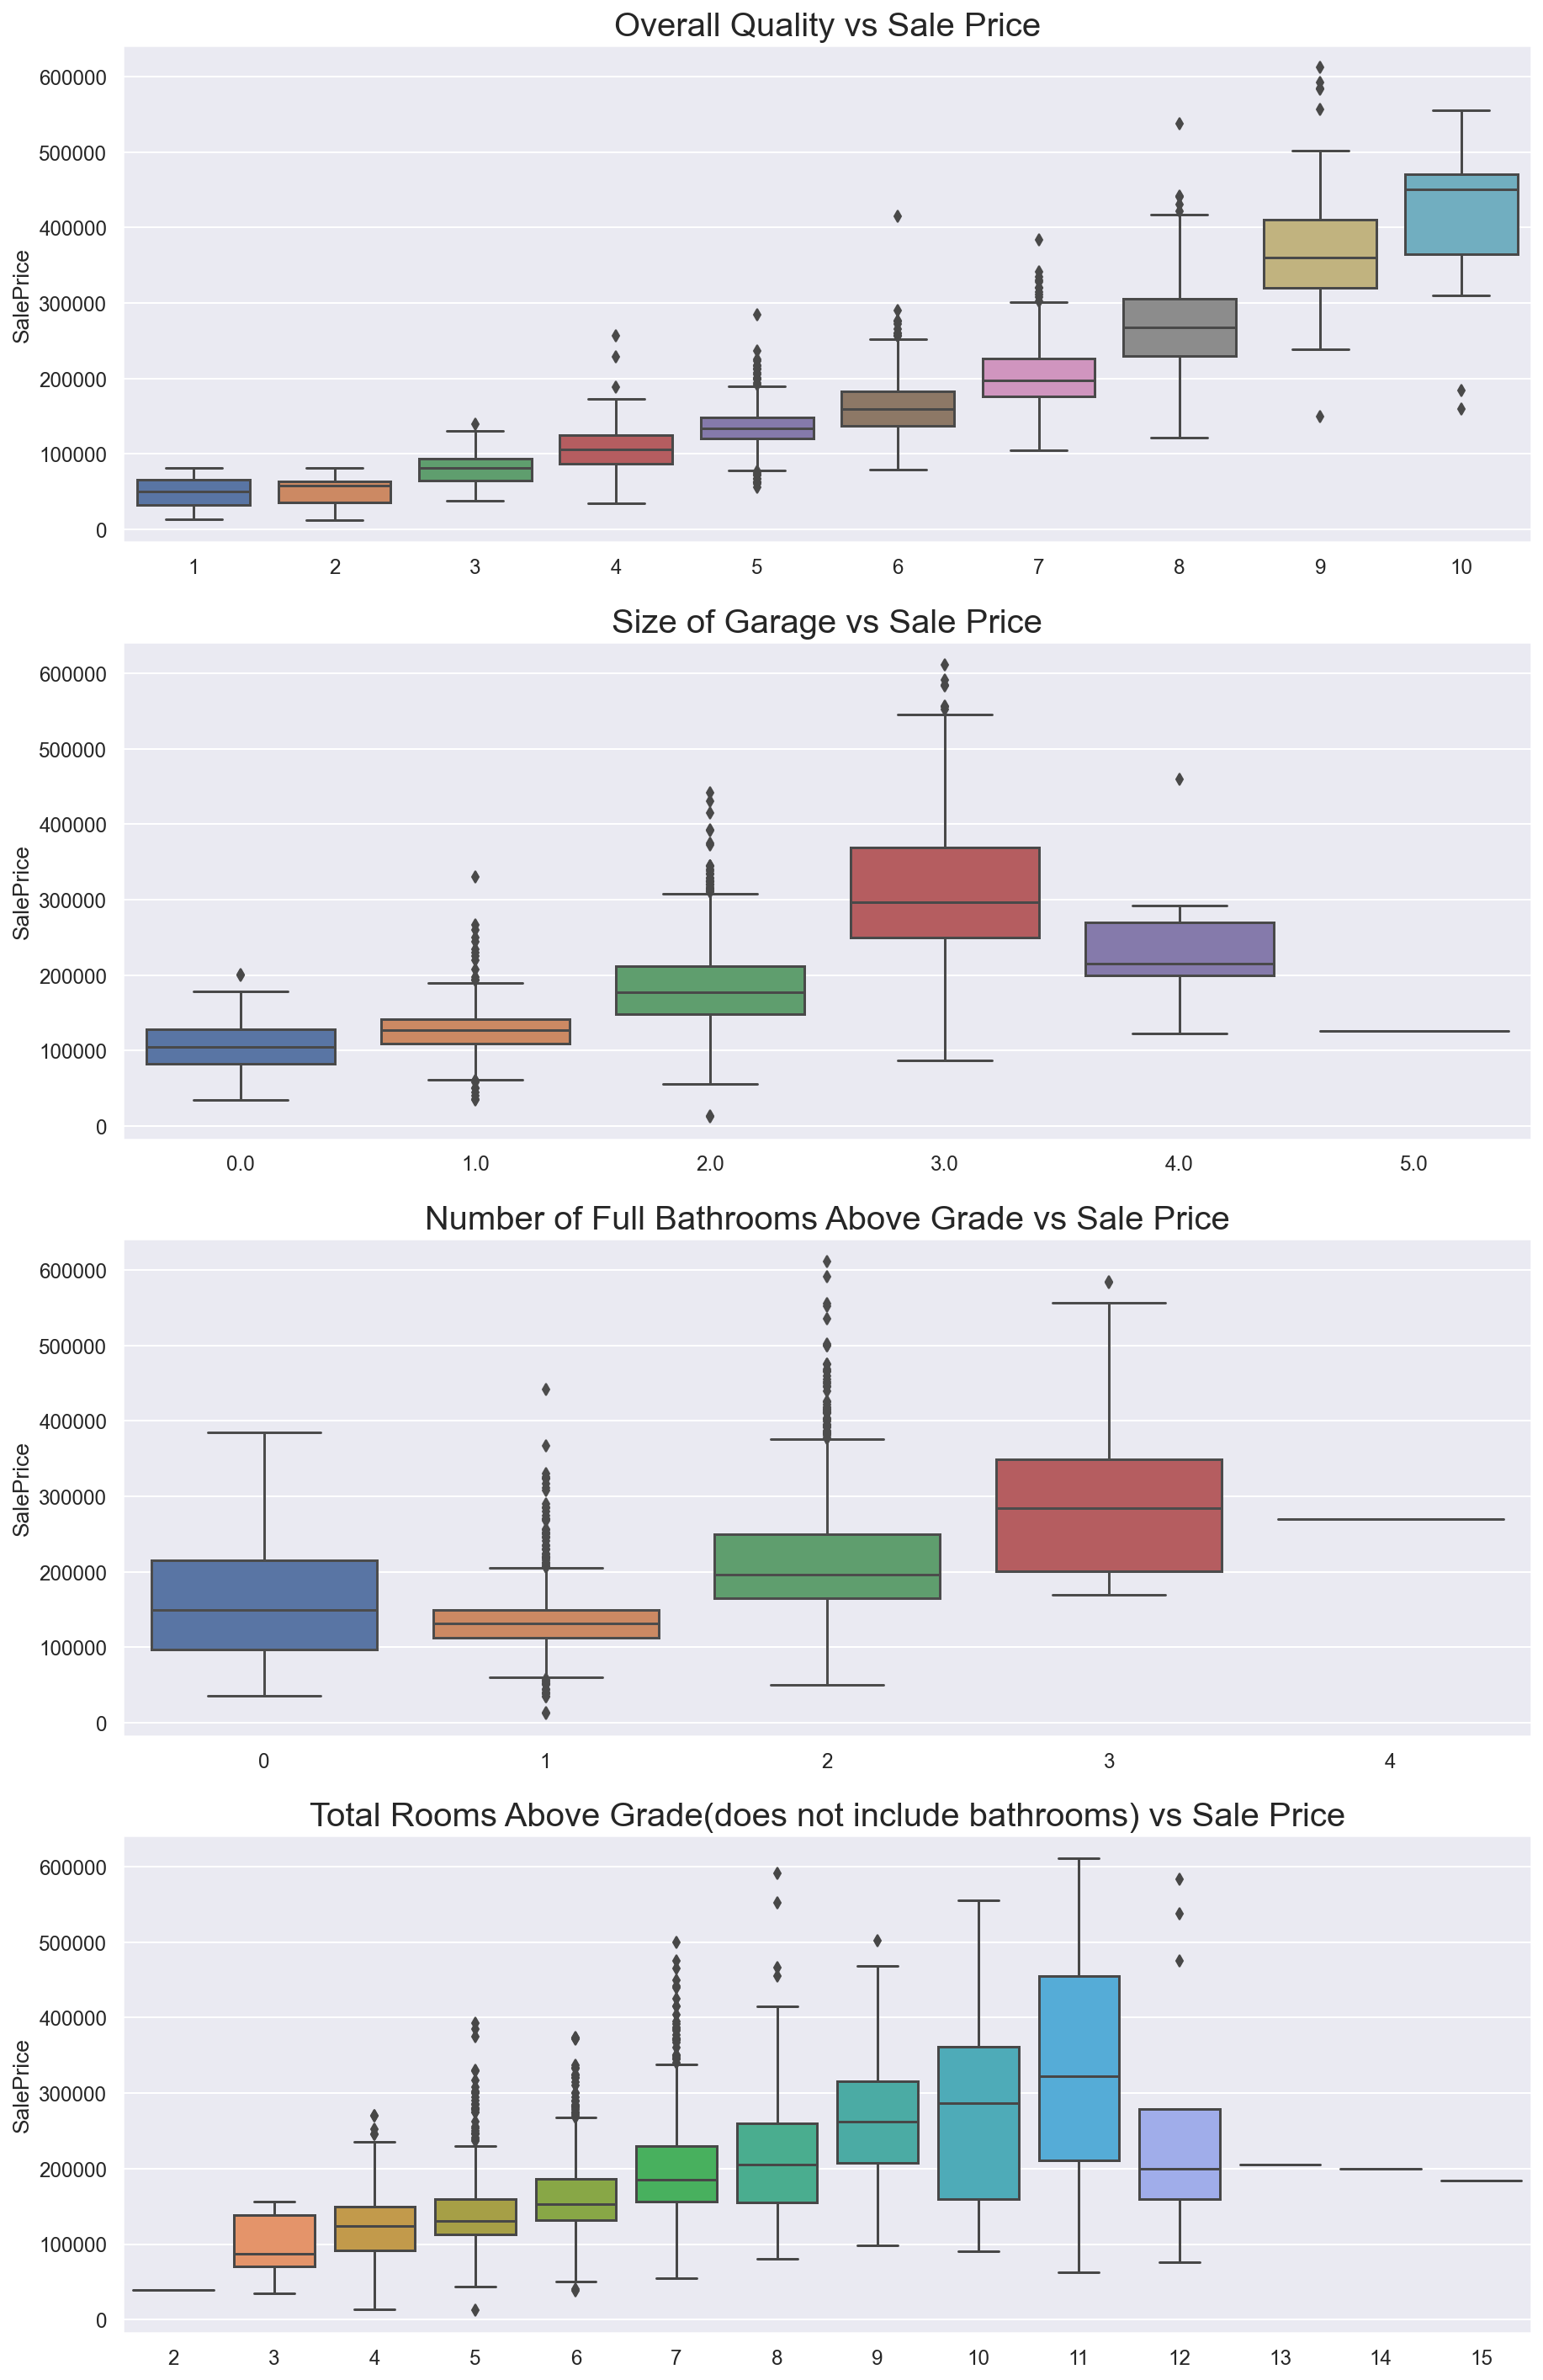

In [6]:
#plot boxplots for features
fig, axes = plt.subplots(4, figsize=(15, 25));

sns.boxplot(ax=axes[0], data=train, x='Overall Qual', y='SalePrice');
sns.boxplot(ax=axes[1], data=train, x='Garage Cars', y='SalePrice');
sns.boxplot(ax=axes[2], data=train, x='Full Bath', y='SalePrice');
sns.boxplot(ax=axes[3], data=train, x='TotRms AbvGrd', y='SalePrice');

#set title to sub plots
axes[0].set_title("Overall Quality vs Sale Price", fontsize=20);
axes[1].set_title("Size of Garage vs Sale Price", fontsize=20);
axes[2].set_title("Number of Full Bathrooms Above Grade vs Sale Price", fontsize=20);
axes[3].set_title("Total Rooms Above Grade(does not include bathrooms) vs Sale Price", fontsize=20);

#remove x label
axes[0].set(xlabel=None);
axes[1].set(xlabel=None);
axes[2].set(xlabel=None);
axes[3].set(xlabel=None);

#### Analysis of Boxplots

We can infer from the boxplots that **overall quality** follows a relatively positive linear relationship with sale price. There exist serval extreme outliers like conditions 6 and 8, where the there are 1 or 2 houses that were sold at a much higher price than usual outliers. 

For **garage cars**, extreme outliers exist for capacity 1 and 4. The distribution is slightly skewed to the left, but relatively normal. The sale price of a house decreased slightly when garage capacity is at 4. 

Similarly for **full baths**, it shows a general upward trend against sale price with many outliers especially for 1 and 2 baths that are above grade.

The distribution of **total rooms above grade** is similar to the number of full bathrooms above grade that is slight skewed to the left. There seems to be alot of outliers as well and extreme ones exist for 12 and 8 rooms

### Scatter Plots

Scatter plots allow us to analyze trends of features of a house. These trends include the correlation strenth in relation to sales price and its residuals. 

##### Regression plot for Gr Liv Area with Sale Price

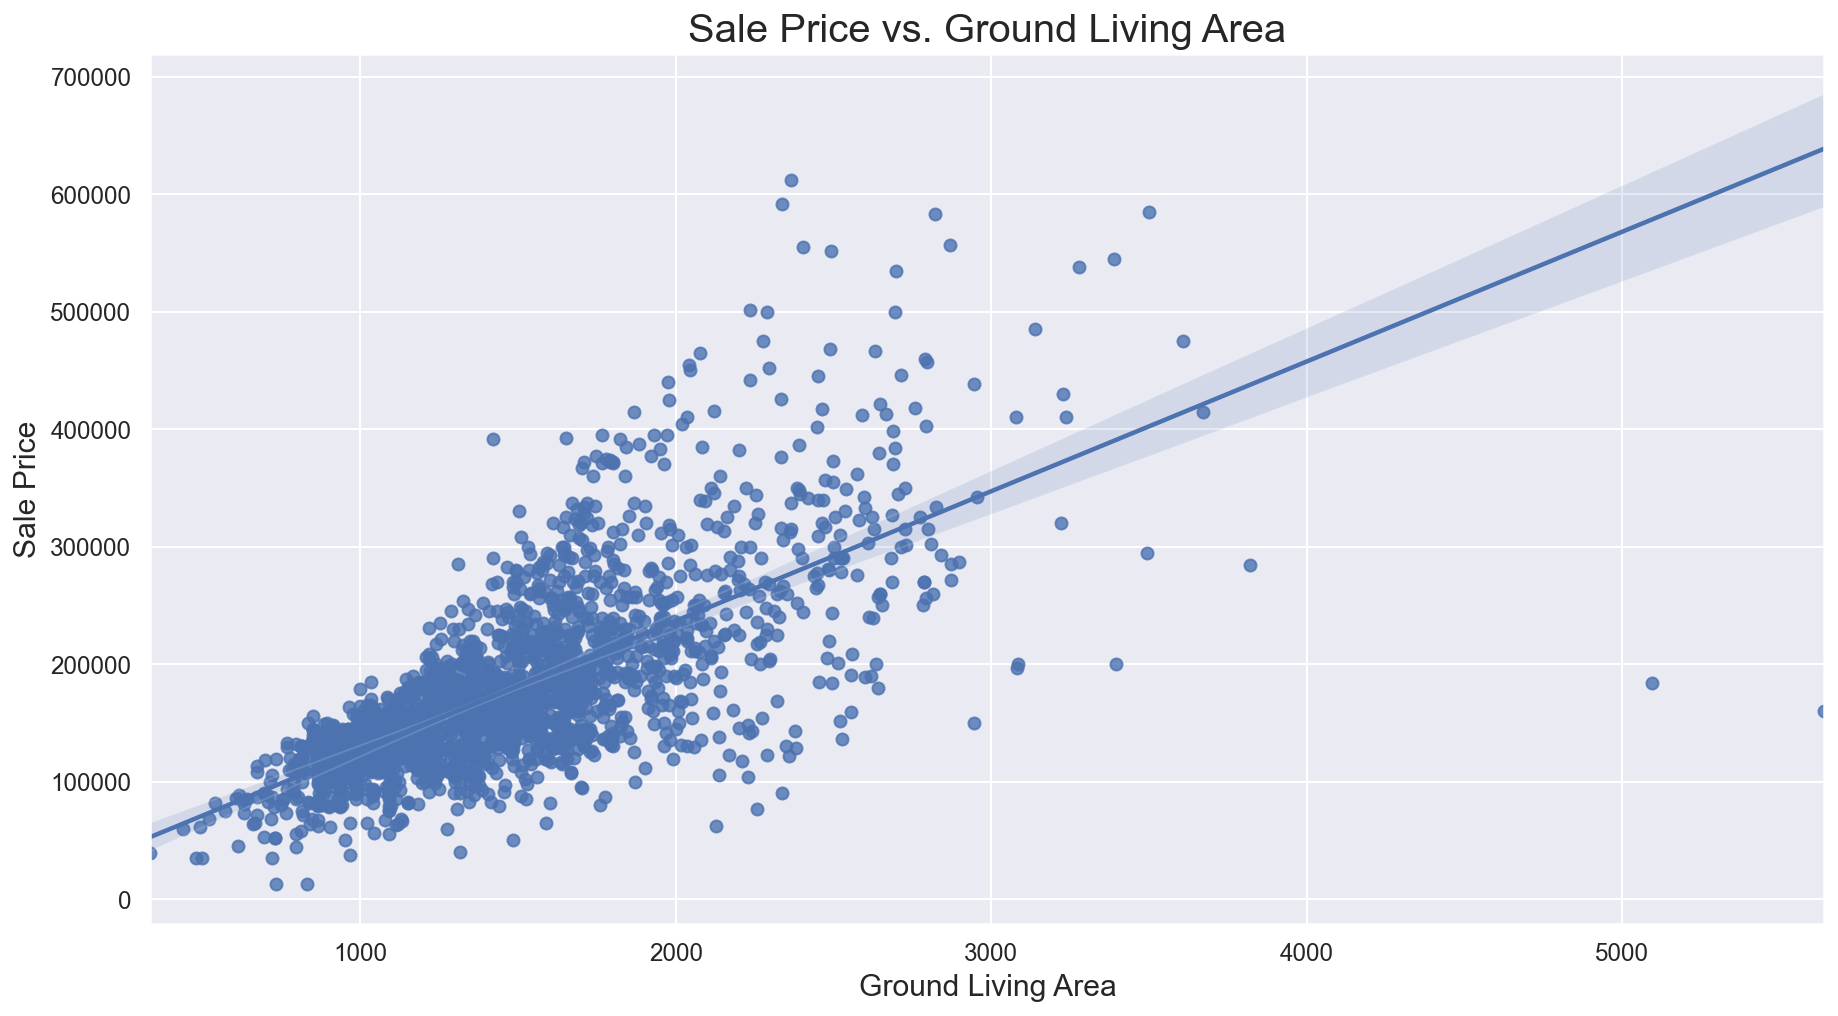

In [7]:
#plot regression plot of Ground Living Area with sales price
plt.figure(figsize=(15,8))
sns.regplot(data=train, x='Gr Liv Area',
            y='SalePrice', marker='o');
plt.title('Sale Price vs. Ground Living Area', fontsize = 20)
plt.xlabel('Ground Living Area', fontsize = 15);
plt.ylabel('Sale Price', fontsize = 15);


##### Regression plot for Garage Area with Sale Price

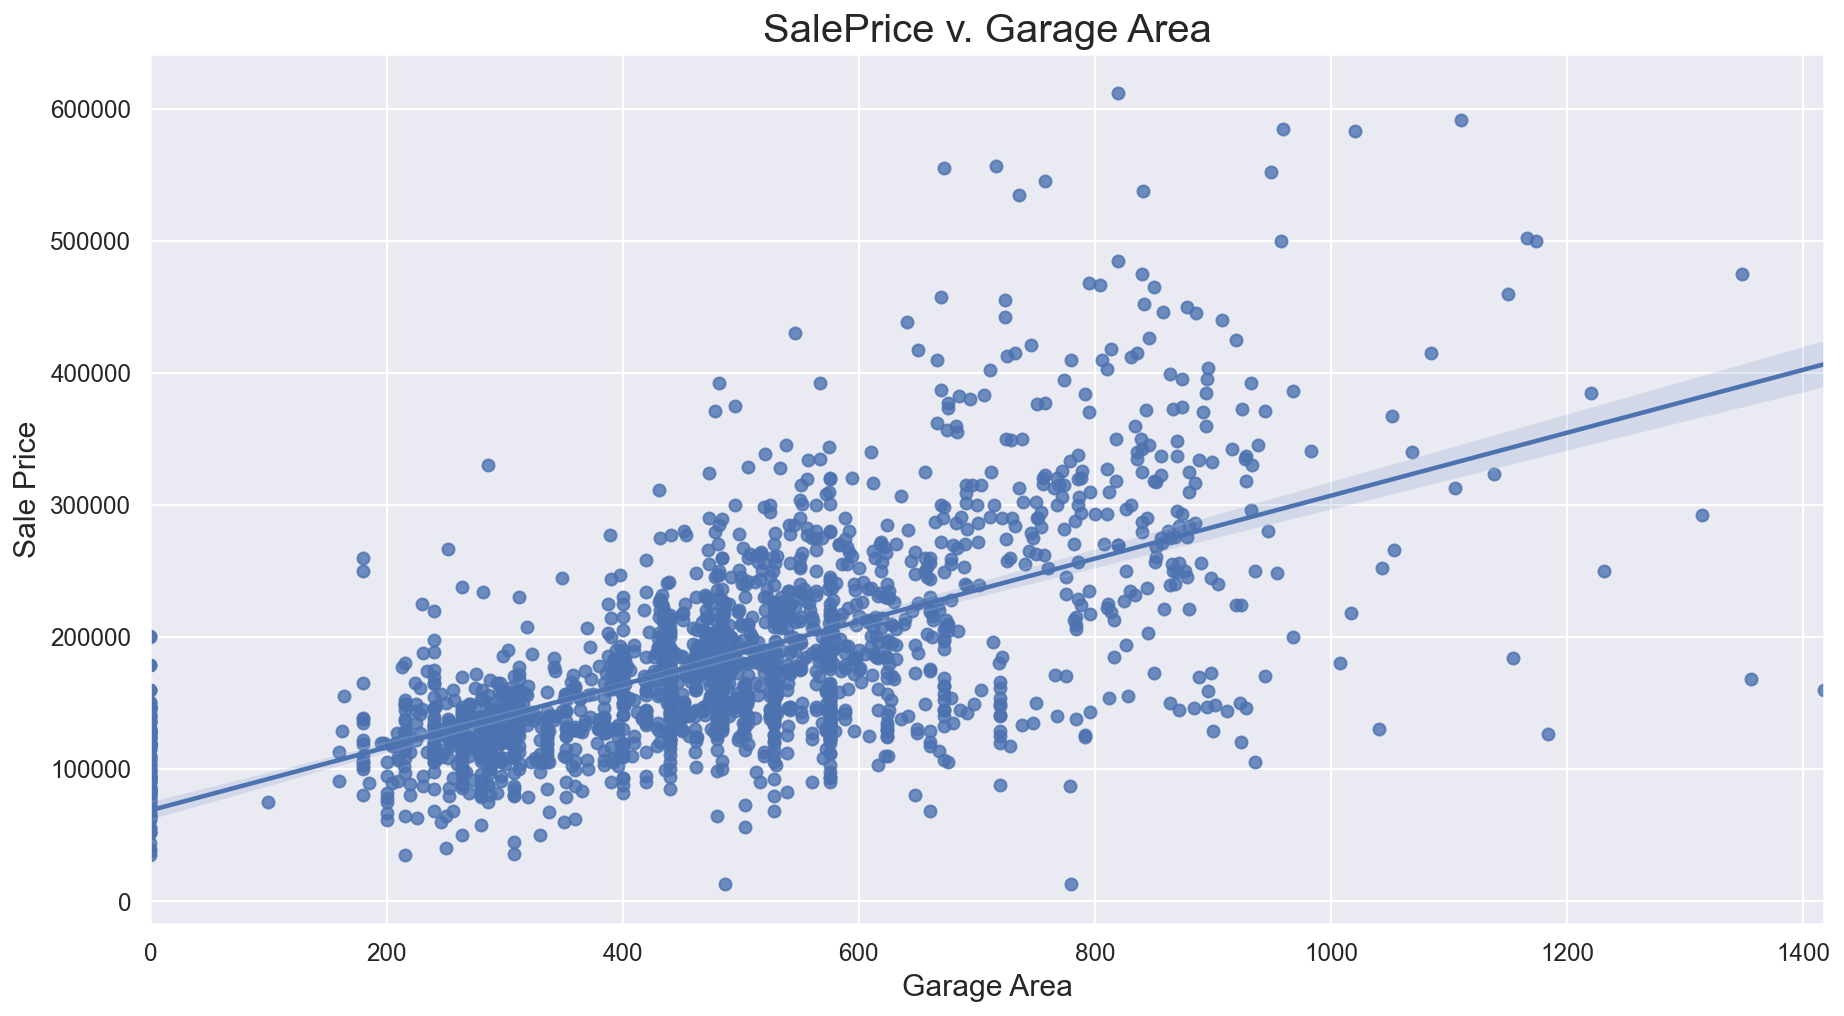

In [8]:
#plot regression plot of Garage Area with sales price
plt.figure(figsize=(15,8))
sns.regplot(data=train, x='Garage Area',
            y='SalePrice', marker='o');
plt.title('SalePrice v. Garage Area', fontsize = 20)
plt.xlabel('Garage Area', fontsize = 15);
plt.ylabel('Sale Price', fontsize = 15);


##### Regression plot for Total Basement Area with Sale Price

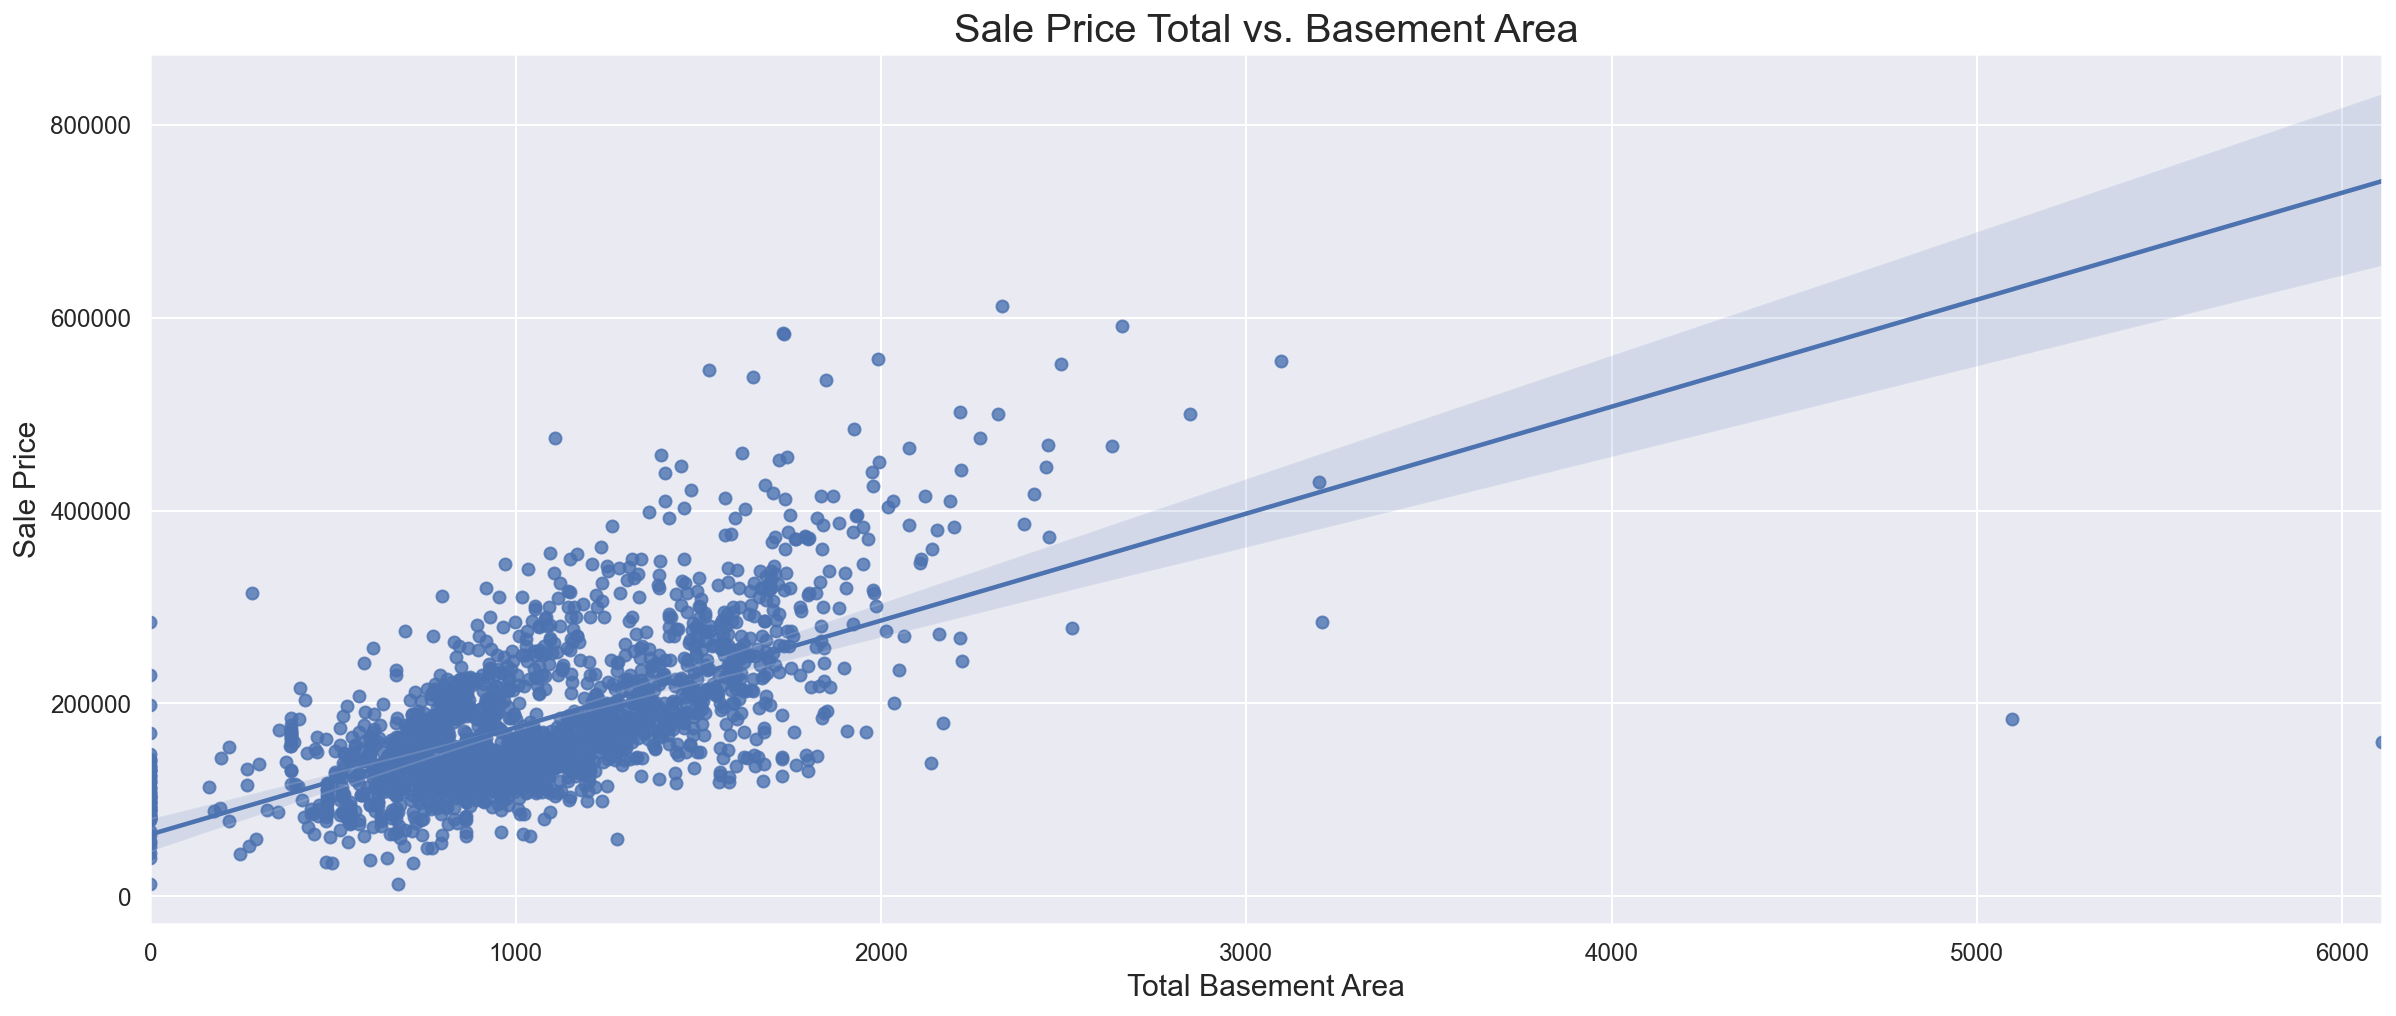

In [9]:
#plot regression plot of Total Basement Area with sales price
plt.figure(figsize=(20,8))
sns.regplot(data=train, x='Total Bsmt SF',
            y='SalePrice', marker='o');
plt.title('Sale Price Total vs. Basement Area', fontsize = 20)
plt.xlabel('Total Basement Area', fontsize = 15);
plt.ylabel('Sale Price', fontsize = 15);

##### Regression plot for Size of 1st Floor with Sale Price

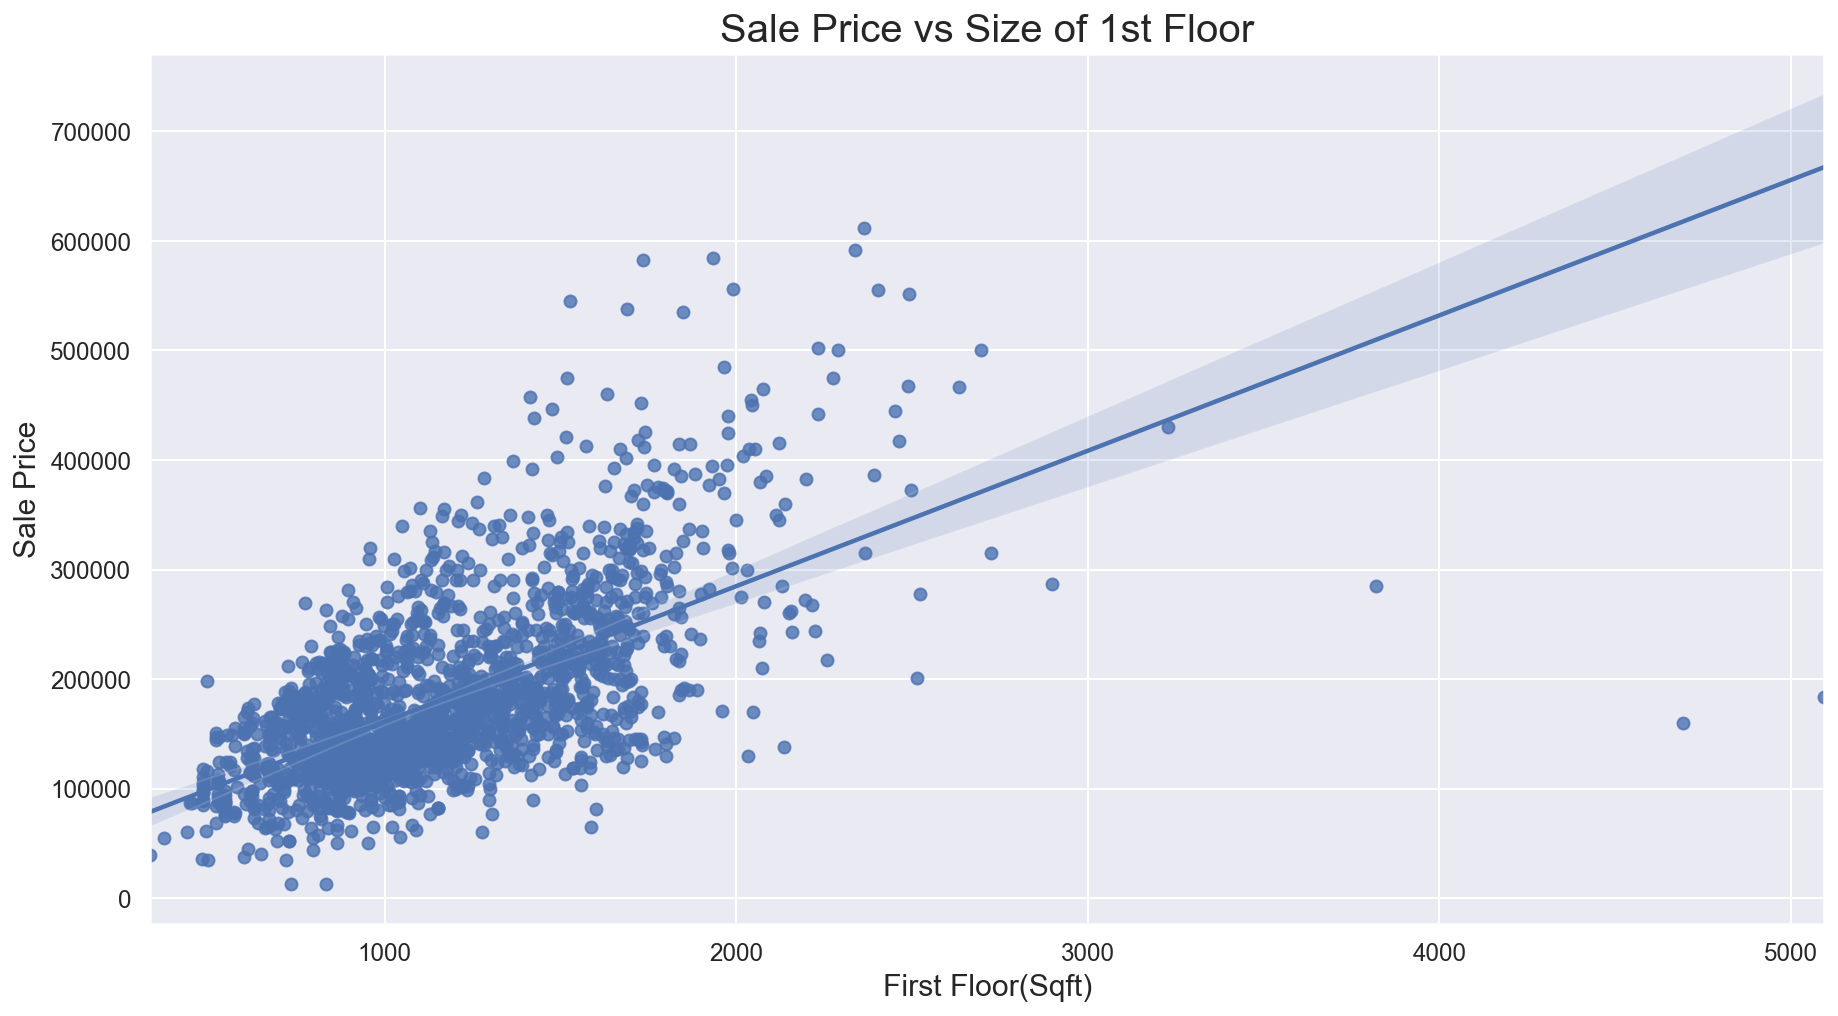

In [10]:
#plot regression plot of Size of 1st Floor with sales price
plt.figure(figsize=(15,8))
sns.regplot(data=train, x='1st Flr SF',
            y='SalePrice', marker='o');
plt.title('Sale Price vs Size of 1st Floor', fontsize = 20)
plt.xlabel('First Floor(Sqft)', fontsize = 15);
plt.ylabel('Sale Price', fontsize = 15);

##### Regression plot for Year Built with Sale Price

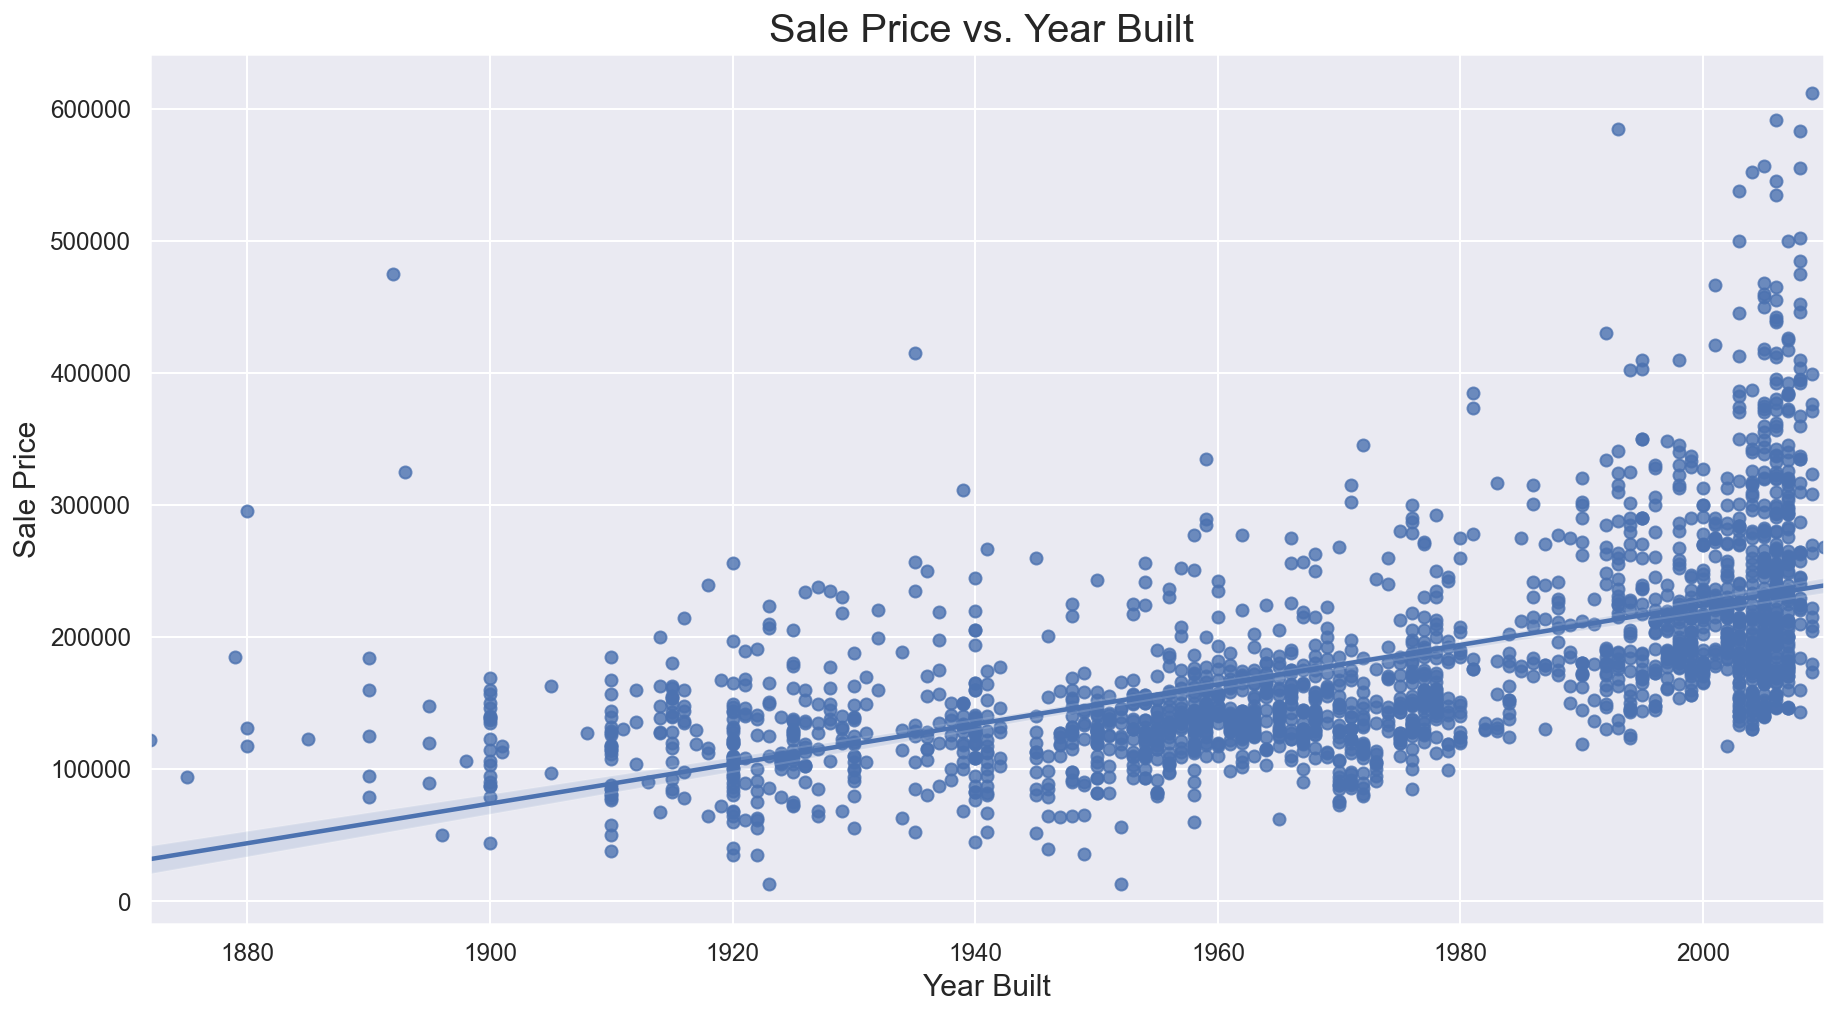

In [11]:
#plot regression plot of yeaer built with sales price
plt.figure(figsize=(15,8))
sns.regplot(data=train, x='Year Built',
            y='SalePrice', marker='o');
plt.title('Sale Price vs. Year Built ', fontsize = 20)
plt.xlabel('Year Built', fontsize = 15);
plt.ylabel('Sale Price', fontsize = 15);

##### Regression plot for Year Remodeled with Sale Price

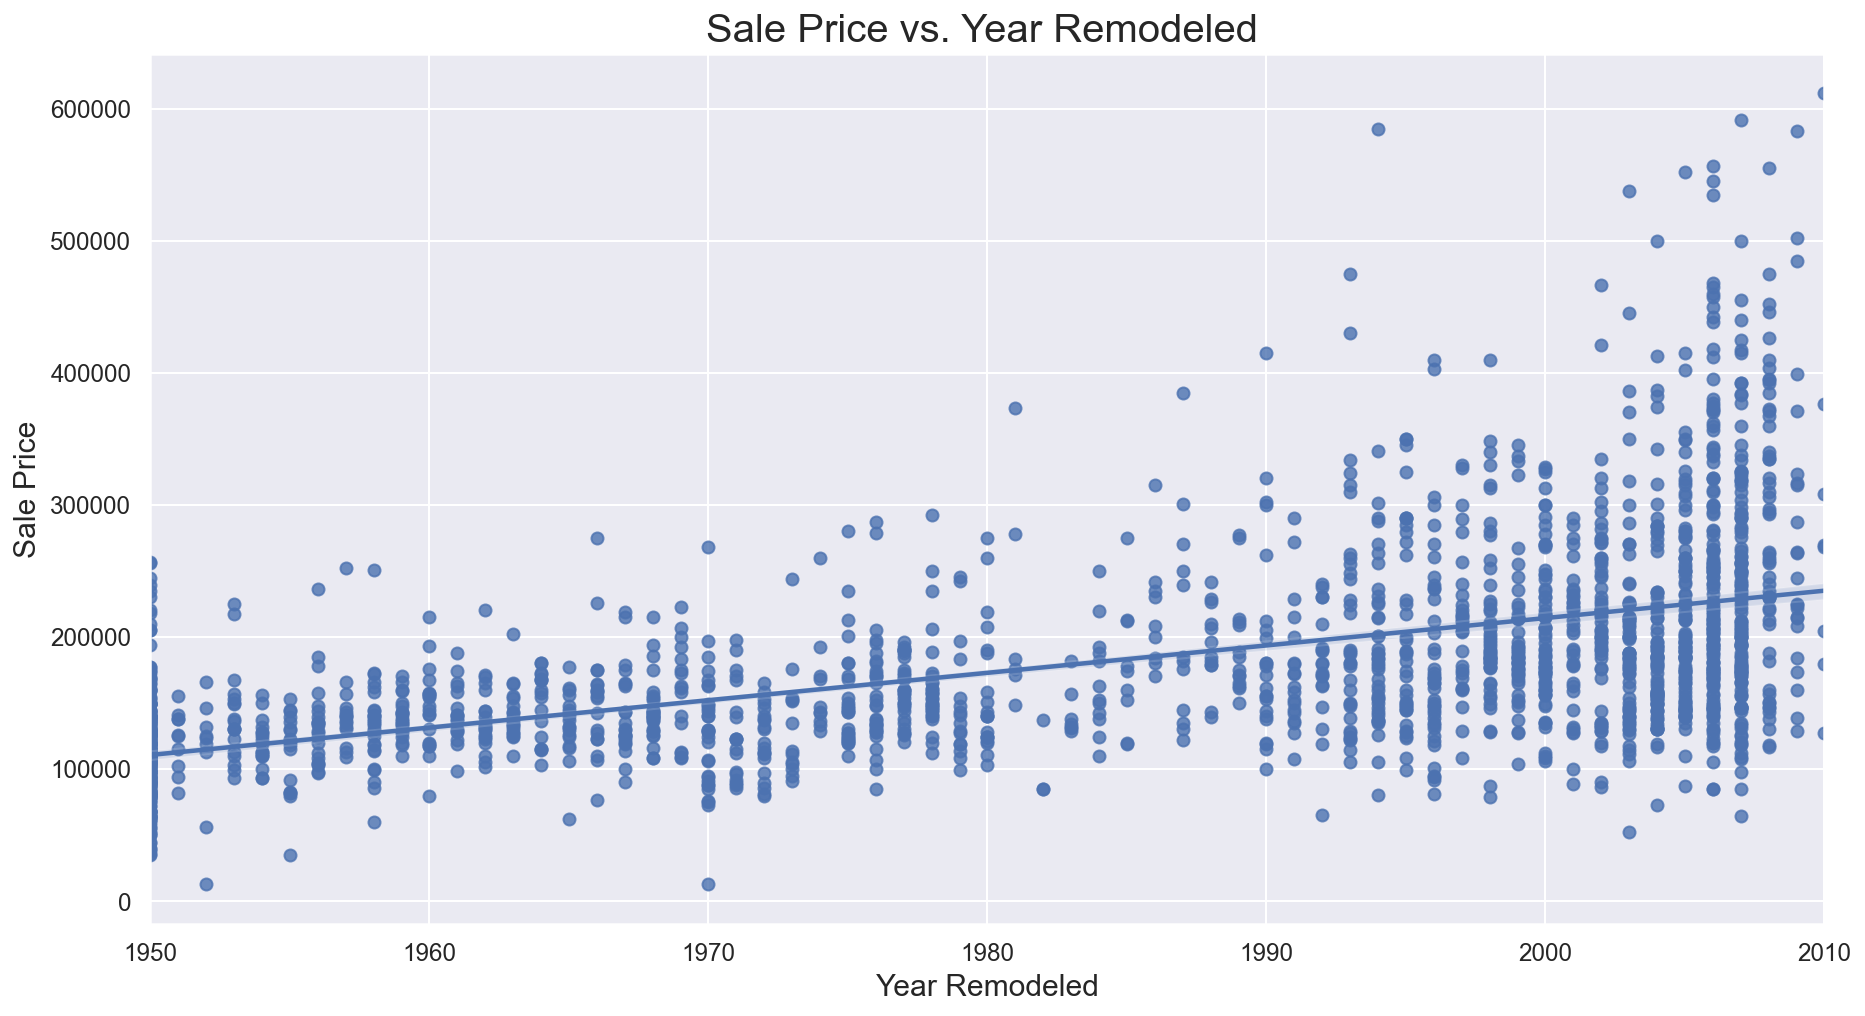

In [12]:
#plot regression plot of Year Remodeled with sales price
plt.figure(figsize=(15,8))
sns.regplot(data=train, x='Year Remod/Add',
            y='SalePrice', marker='o');
plt.title('Sale Price vs. Year Remodeled ', fontsize = 20)
plt.xlabel('Year Remodeled', fontsize = 15);
plt.ylabel('Sale Price', fontsize = 15);

#### Analysis of Scatter Plots

We can infer from the scatter plots that **Ground Living Area**, **Total Basement Area**, **Garage Area**, **Size of 1st Floor**,**Total Basement Area** follows a relatively positive linear relationship with sale price. This means that in general, the larger the size of a house, the higher the sale price which makes sense. Points on the graph are closely grouped together around. Another point to note that there exist serval outliers as well

For **Year Built** and **Year Remodeled**, we find that price generally increase upwards for as years get later. Likewise there are several outliers for both scatter plots

### Summary of EDA

From the heatmap above we can see that the features with the highest correlation with price are those that have to do with area and quality. This is backed up by the scatter and box plots we performed on them which shows a positive linear relationship. Hence quality and size of a house are generally the one of the biggest few factors that affect sale prices for houses. 

However we still have to acknowledge that there are some outliers in the plots which we will need to consider as well. This means that there are other factors that affect house prices that are not shown visually and only a robust model can better predict

In the next notebook we will cleaning, mapping and evaluating categorical features that are ordinal or nominal, which may or may not affect the sale price of a house. 